In [23]:
# Import Dependencies
import pandas as pd
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import linregress
import scipy.stats as st

# File to Load
state_and_county_variables_values = Path("/Users/jessmroczek/Documents/DA_Bootcamp/Homework Files/HW_Repositories/Project1/FoodEnvironmentAtlas/StateAndCountyData.csv")
Population_Data = Path("/Users/jessmroczek/Documents/DA_Bootcamp/Homework Files/HW_Repositories/Project1/FoodEnvironmentAtlas/SupplementalDataCounty.csv")

# Read the modified state_and_county csv and store into Pandas DataFrame
Population_Data_df = pd.read_csv(Population_Data, encoding="utf-8")
state_and_county_df = pd.read_csv(state_and_county_variables_values, encoding="utf-8")
state_and_county_df.head()

georgia_county_filter = state_and_county_df['State']== 'GA'
GAcounties = state_and_county_df.loc[georgia_county_filter, ['County', 'Variable_Code', 'Value']]
GA_Population_Data_df = Population_Data_df.loc[georgia_county_filter, ['County', 'Variable_Code', 'Value']]
GA_Population_Data_df.head()
# GAcounties.head()

,County,Variable_Code,Value
15864,White Pine County,Population_Estimate_2016,9721
15865,White Pine County,Population_Estimate_2017,9599
15866,White Pine County,Population_Estimate_2018,9475
15867,Carson City,2010_Census_Population,55274
15868,Carson City,Population_Estimate_2011,54679


In [27]:
variable_filter = ((GAcounties['Variable_Code'] == 'POVRATE15'))
Poverty_Rate = GAcounties.loc[variable_filter, ['County', 'Variable_Code', 'Value']]
Poverty_Rate = Poverty_Rate.drop("Variable_Code", axis=1)
Poverty_Rate.head()


,County,Value
781069,Appling,22.5
781084,Atkinson,26.9
781099,Bacon,23.9
781114,Baker,28.7
781129,Baldwin,26.0


In [28]:
variable_filter = ((GAcounties['Variable_Code'] == 'GROC16'))
Grocery_Stores = GAcounties.loc[variable_filter, ['County', 'Variable_Code', 'Value']]
Grocery_Stores = Grocery_Stores.drop("Variable_Code", axis=1)
Grocery_Stores.head()


,County,Value
142042,Appling,2.0
142078,Atkinson,2.0
142114,Bacon,2.0
142150,Baker,1.0
142186,Baldwin,7.0


In [30]:
# Merge the DataFrames based on the "County" column
merged_data = pd.merge(Poverty_Rate, Grocery_Stores, on="County", how="inner")
merged_data = merged_data.rename(columns={"Value_x": "Poverty Rate",
                                          "Value_y": "# of Grocery Stores"})

# Display the merged DataFrame
merged_data


,County,Poverty Rate,# of Grocery Stores
0,Appling,22.5,2.0
1,Atkinson,26.9,2.0
2,Bacon,23.9,2.0
3,Baker,28.7,1.0
4,Baldwin,26.0,7.0
...,...,...,...
154,Whitfield,15.3,24.0
155,Wilcox,30.4,0.0
156,Wilkes,22.9,3.0
157,Wilkinson,20.9,3.0


In [55]:
#"Population, low access to store, 2015",Access and Proximity to Grocery Store,ACCESS,Overall,LACCESS_POP15,CNTY10,Count
variable_filter = ((GAcounties['Variable_Code'] == 'LACCESS_POP15'))
LAtoGA = GAcounties.loc[variable_filter, ['County', 'Variable_Code', 'Value']]
LAtoGA = LAtoGA.drop("Variable_Code", axis=1)
LAtoGA.head()

,County,Value
15865,Appling,3671.279857
15906,Atkinson,1919.599016
15947,Bacon,1369.729366
15988,Baker,2616.917116
16029,Baldwin,7587.250750


In [56]:
#Merge data
merged_data = pd.merge(merged_data, LAtoGA, on="County", how="inner")
merged_data = merged_data.rename(columns={"Value": "Population, low access to store"})

# Display the merged DataFrame
merged_data

,County,Poverty Rate,# of Grocery Stores,"Population, low access to store"
0,Appling,22.5,2.0,3671.279857
1,Atkinson,26.9,2.0,1919.599016
2,Bacon,23.9,2.0,1369.729366
3,Baker,28.7,1.0,2616.917116
4,Baldwin,26.0,7.0,7587.250750
...,...,...,...,...
153,Whitfield,15.3,24.0,23220.297310
154,Wilcox,30.4,0.0,72.807531
155,Wilkes,22.9,3.0,1963.798339
156,Wilkinson,20.9,3.0,2076.777084


In [ ]:
#"SNAP benefits per capita, 2017",Food Assistance,ASSISTANCE,SNAP,PC_SNAPBEN17,CNTY10,Dollars/capita
#"National School Lunch Program participants (% children), 2017*",Food Assistance,ASSISTANCE,National School Lunch Program,PCT_NSLP17,CNTY10,Percent


In [57]:
HighPR_Ten_Poverty_Rate = merged_data.nlargest(10, "Poverty Rate")
HighPR_Ten_Poverty_Rate

,County,Poverty Rate,# of Grocery Stores,"Population, low access to store"
127,Stewart,42.0,1.0,595.120378
152,Wheeler,39.3,1.0,366.362583
28,Clarke,38.1,23.0,40504.553320
18,Calhoun,37.5,1.0,920.795437
134,Terrell,36.5,6.0,629.597103
81,Jenkins,35.9,1.0,340.970746
69,Hancock,34.7,2.0,2161.807505
133,Telfair,34.7,4.0,379.469584
29,Clay,34.3,2.0,2355.454017
45,Dooly,33.8,0.0,249.845539


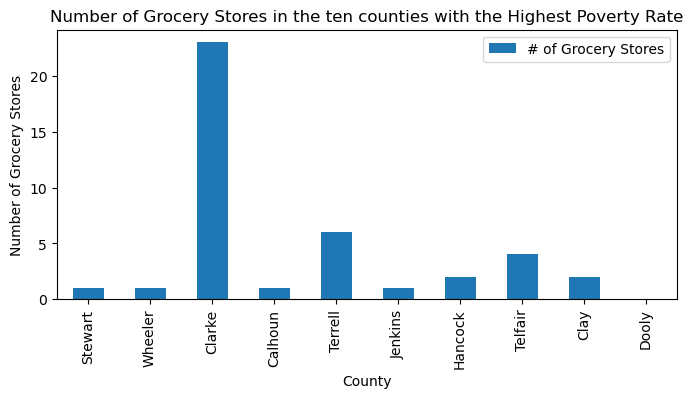

<Figure size 640x480 with 0 Axes>

In [58]:
#Plot Bar Chart to display number of grocery stores in highest poverty places
Grocery_Stores_HP = Top_Ten_Poverty_Rate[["County","# of Grocery Stores"]]
# Set the index to be "County" so they will be used as labels
Grocery_Stores_HP = Grocery_Stores_HP.set_index("County")
Grocery_Stores_HP.head()              
# %%
# Use DataFrame.plot() in order to create a bar chart of the data
Grocery_Stores_HP.plot(kind="bar", figsize=(8,3.5))
# Set a title for the chart
plt.title("Number of Grocery Stores in the ten counties with the Highest Poverty Rate")
plt.ylabel("Number of Grocery Stores")
plt.show()
plt.tight_layout();
# %%


In [59]:
LowPR_Ten_Grocery_Stores = merged_data.nlargest(10, "# of Grocery Stores")
LowPR_Ten_Grocery_Stores

,County,Poverty Rate,# of Grocery Stores,"Population, low access to store"
59,Fulton,16.0,196.0,215972.95320
43,DeKalb,17.8,152.0,168085.21480
66,Gwinnett,12.6,145.0,238353.74860
32,Cobb,11.4,108.0,268612.01390
24,Chatham,17.8,52.0,58615.01194
30,Clayton,23.3,51.0,99211.82104
105,Muscogee,22.2,41.0,54150.99121
10,Bibb,26.7,39.0,38423.19675
57,Forsyth,6.3,36.0,46512.36256
120,Richmond,24.3,36.0,78927.44119


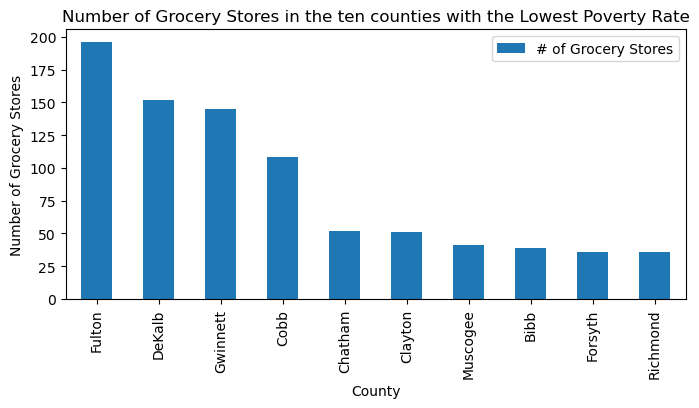

<Figure size 640x480 with 0 Axes>

In [60]:
#Plot Bar Chart to display number of grocery stores in highest poverty places
Grocery_Stores_LP = LowPR_Ten_Grocery_Stores[["County","# of Grocery Stores"]]
# Set the index to be "County" so they will be used as labels
Grocery_Stores_LP = Grocery_Stores_LP.set_index("County")
Grocery_Stores_LP.head()              
# %%
# Use DataFrame.plot() in order to create a bar chart of the data
Grocery_Stores_LP.plot(kind="bar", figsize=(8,3.5))
# Set a title for the chart
plt.title("Number of Grocery Stores in the ten counties with the Lowest Poverty Rate")
plt.ylabel("Number of Grocery Stores")
plt.show()
plt.tight_layout();
